In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math

### Logistic regression (1-D)

First, lets generate some 1-D training data:

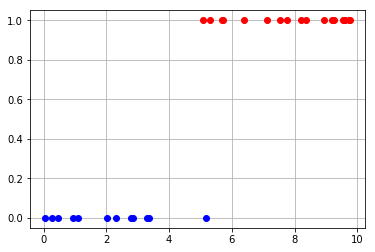

In [2]:
def generate_data_1D (N=30):
    w = np.array([-16,3])
    x = np.random.random((N,1))*10
    X = np.concatenate((np.ones((N,1)),x),axis=1)
    z = np.dot(X,w)
    h = 1/(1+np.exp(-z))
    r = np.random.rand(N)
    y = np.zeros(N)
    y[r<h] = 1
    return x,y

x,y = generate_data_1D()

plt.plot(x[y==0],y[y==0],'ob')
plt.plot(x[y==1],y[y==1],'or')
plt.grid()
plt.show()

Next, implement a *gradient descent* algorithm to solve the *logistic regression* problem:



$$  \hat{y_{}}(\vec{x};\vec{w}) = g(\vec{w}\cdot\vec{x}) $$

where $\vec{x},\vec{w}\in\mathcal{R}^d$ and $g(\cdot)$ is the sigmoid function:

$$ g(z)=\frac{1}{1+e^{-z}} $$

Assume the input data ($N$ samples) is given in a matrix $X$ of size $N\times d$.



In [3]:
def gradient_descent (X, y, alpha=0.1, T=100):
    J = np.zeros(T) 
    N,d = X.shape
    w = np.zeros(d)  
    for t in range(T):
        z=X.dot(w)
        h=1/(1+np.exp(-z)) # logistic regression
        w = w - alpha*((1/N)*X.T.dot(h-y))
        J[t] = -1*(1/N)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
        
    return w, J 

Use your gradient descent function to fit a logistic model to the training data:

$$  \hat{y_{}}(\vec{x};\vec{w}) = g(\vec{w}\cdot\vec{x}) = g(w_0 + w_1 x)$$

hint: don't forget to add a 'ones' coloumn to the input matrix.

(as always, make sure the algorithm indeed converged).



Finally, plot data points together with the sigmoid regression line. Try to add vertical lines from each data point to the regression line.

array([-1.2867608 ,  0.45346707])

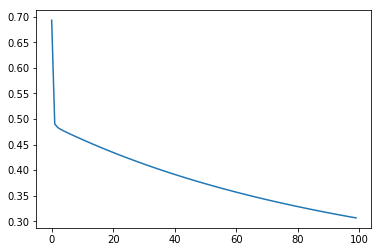

In [4]:
# your code here.. 
X=np.hstack((np.ones(x.shape[0])[:, np.newaxis], x))
w, J=gradient_descent (X, y, alpha=0.1, T=100)
plt.plot(J)
w

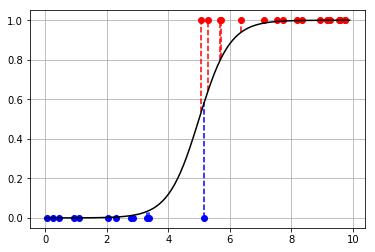

In [5]:
plt.plot(x[y==0],y[y==0],'ob')
plt.plot(x[y==1],y[y==1],'or')
plt.vlines(x[y==1],(1/(1+np.exp(-2*(x[y==1])+10))),1,colors='r',linestyles='--')
plt.vlines(x[y==0],0,(1/(1+np.exp(-2*(x[y==0])+10))),colors='b',linestyles='--')
z=np.arange(0,10,0.1)

plt.plot(z,(1/(1+np.exp(-2*z+10))),'black') # logistic regression

plt.grid()
plt.show()

### Logistic regression (2-D)

Lets generate some 2-D training data:



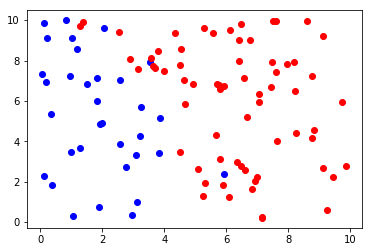

In [6]:
def generate_data_2D (N=100):
    x = np.random.random((N,2))*10
    X = np.concatenate((np.ones((N,1)),x),axis=1);
    w = np.array([-16,3,1])
    z = np.dot(X,w)
    h = 1/(1+np.exp(-z))
    r = np.random.rand(N)
    y = np.zeros(N)
    y[r<h] = 1
    return x,y


x,y = generate_data_2D()

plt.plot(x[y==0,0],x[y==0,1],'ob')
plt.plot(x[y==1,0],x[y==1,1],'or')
plt.show()



Use the same algoirthm from part I, to learn a 2-D logistic model:

$$  \hat{y_{}}(\vec{x};\vec{w}) = g(\vec{w}\cdot\vec{x}) = g(w_0 + w_1 x_1 + w_2 x_2)$$




- Use `meshgrid` and `contour` to plot the 2-D function $g(\vec{w}\cdot\vec{x})$. Use the blue-white-red colormap: cmap=plt.cm.bwr
- Plot the data points (in blue and red) on top of the previous plot
- Try to add a black contour line that represents the *decision boundary*: $g(\vec{w}\cdot\vec{x})=0.5$ 

array([0.00535477, 0.1119466 , 0.04346939])

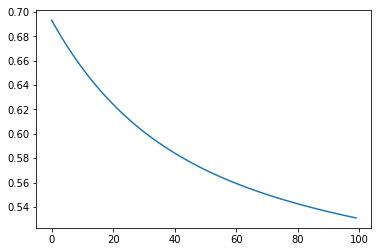

In [7]:
# your code here..

# your code here.. 
X=np.hstack((np.ones(x.shape[0])[:, np.newaxis], x))
w, J=gradient_descent (X, y, alpha=0.001, T=100)
plt.plot(J)
w

In [8]:
def gradient_descent (X, y, alpha=0.01, T=100):
    J = np.zeros(T) 
    N,d = X.shape
    w = np.zeros(d)  
    for t in range(T):
        z=X.dot(w)
        h=1/(1+np.exp(-z)) # logistic regression
        w = w - alpha*((1/N)*X.T.dot(h-y))
        J[t] = -1*(1/N)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
        
    return w, J 

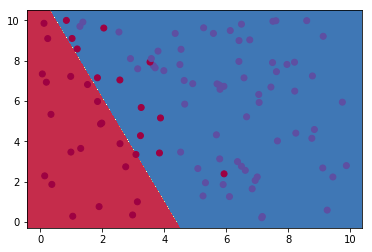

In [9]:
# Set min and max values and give it some padding
x_min, x_max = X[:, 1].min() - .5, X[:, 1].max() + .5
y_min, y_max = X[:, 2].min() - .5, X[:, 2].max() + .5
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole gid
z=w[0]+(w[1:].dot(np.c_[xx.ravel(), yy.ravel()].T))
Z = z#model(z)
Z[Z>0.5]=1
Z[Z<0.5]=0
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.Spectral)

## Good luck !